In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pandas as pd
import pandas_profiling as pp
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline



In [2]:
# current working directory
import os
os.getcwd()

'C:\\Users\\asma0'

In [3]:
# Changing working directory path
os.chdir(r"C:\Users\asma0\OneDrive\Desktop\Medak project")


In [4]:
# Current working directory
os.getcwd()

'C:\\Users\\asma0\\OneDrive\\Desktop\\Medak project'

In [5]:
# Loading data set
best_crop = pd.read_excel('C://Users//asma0//OneDrive//Desktop//Medak project//month_wise_medak.xlsx')

In [6]:
# Viewing data set
best_crop

district      date           Crop crop_type  crop_sown  rainfall(mm)  \
0       Medak  2019-Jan          PADDY    grains          0          0.00   
1       Medak  2019-Jan          Wheat    grains          0          0.00   
2       Medak  2019-Jan         JOWAR     grains          0          0.00   
3       Medak  2019-Jan         BAJRA     grains          0          0.00   
4       Medak  2019-Jan          MAIZE    grains          0          0.00   
...       ...       ...            ...       ...        ...           ...   
1795    Medak  2021-Dec       Mulberry     fruit          0          0.12   
1796    Medak  2021-Dec        Coconut     fruit          0          0.12   
1797    Medak  2021-Dec        Jasmine    flower          1          0.12   
1798    Medak  2021-Dec  Chrysanthemum    flower          0          0.12   
1799    Medak  2021-Dec        Avacado     fruit          0          0.12   

      temp_avg(°C)  humidity_avg(%)  wind_speed_avg(Kmph)  mrp(rs/kg)  ...  \
0         22.04495        59.179032              0.919355      17.294  ...   
1         22.04495        59.179032              0.919355      18.400  ...   
2         22.04495        59.179032              0.919355      24.500  ...   
3         22.04495        59.179032              0.919355      19.500  ...   
4         22.04495        59.179032              0.919355      17.000  ...   
...            ...              ...                   ...         ...  ...   
1795      24.25600        78.780000              3.345000     169.000  ...   
1796      24.25600        78.780000              3.345000     111.000  ...   
1797      24.25600        78.780000              3.345000     966.000  ...   
1798      24.25600        78.780000              3.345000      80.000  ...   
1799      24.25600        78.780000              3.345000     195.000  ...   

      avg_pH  N(kg/ha)  P(kg/ha)  K(kg/ha)  irrigation gross_profit(rs/ac)  \
0       5.75     150.0        60      60.0         yes                 0.0   
1       6.50      80.0        40      40.0         yes                 0.0   
2       6.75      80.0        40      40.0         yes                 0.0   
3       0.75      80.0        40      40.0          no                 0.0   
4       6.50      60.0        30      30.0         yes                 0.0   
...      ...       ...       ...       ...         ...                 ...   
1795    6.50     350.0       140     140.0         yes                 0.0   
1796    6.60     800.0        40     160.0          no                 0.0   
1797    7.00      50.0       100     100.0          no            772800.0   
1798    6.75     125.0       120      25.0         yes                 0.0   
1799    6.00      50.0        25      25.0         yes                 0.0   

      net_profit(rs/ac)       ROI(%)        sow_and_harvest          crop_term  
0                   0.0     0.000000    one_sow_one_harvest         short_term  
1                   0.0     0.000000    one_sow_one_harvest  intermediate_term  
2                   0.0     0.000000    one_sow_one_harvest         short_term  
3                   0.0     0.000000    one_sow_one_harvest         short_term  
4                   0.0     0.000000    one_sow_one_harvest         short_term  
...                 ...          ...                    ...                ...  
1795                0.0     0.000000  one_sow_many_harvests  intermediate_term  
1796                0.0     0.000000  one_sow_many_harvests          long_term  
1797           739300.0  2206.865672   one_sow_few_harvests  intermediate_term  
1798                0.0     0.000000   one_sow_few_harvests         short_term  
1799                0.0     0.000000  one_sow_many_harvests          long_term  

[1800 rows x 26 columns]

In [7]:
# dropped district column as it's not required for anaysis
best_crop.drop('district',
axis='columns', inplace=True)

In [8]:
# no. of rows and columns
best_crop.shape


(1800, 25)

In [9]:
# columns names
best_crop.columns

Index(['date', 'Crop', 'crop_type', 'crop_sown', 'rainfall(mm)',
       'temp_avg(°C)', 'humidity_avg(%)', 'wind_speed_avg(Kmph)', 'mrp(rs/kg)',
       'Min duration(days)', 'max duration(days)', 'duration(months)',
       'avg_cost_of_cultivation(rs/ac)', 'Yield(kg/ac)', 'Soil_type', 'avg_pH',
       'N(kg/ha)', 'P(kg/ha)', 'K(kg/ha)', 'irrigation', 'gross_profit(rs/ac)',
       'net_profit(rs/ac)', 'ROI(%)', 'sow_and_harvest', 'crop_term'],
      dtype='object')

In [10]:
# run the profile report
profile = best_crop.profile_report(title='Pandas Profiling Report')


In [11]:
# save the report as html file
profile.to_file(output_file="pandas_profiling1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# List of various crops

print("Number of various crops: ", len(best_crop['Crop'].unique()))
print("List of Crops: ", best_crop['Crop'].unique())


Number of various crops:  50
List of Crops:  ['PADDY' 'Wheat' 'JOWAR ' 'BAJRA ' 'MAIZE' 'RAGI   ' 'REDGRAM'
 'GREENGRAM  ' 'BLACKGRAM ' 'HORSEGRAM' 'BengalGram' 'Cowpea' 'GROUNDNUT'
 'SESAMUM (Gingelly)' 'SUNFLOWER' 'Safflower' 'CASTOR  ' 'SOYABEAN'
 'COTTON' 'Chillies' 'SUGARCANE  ' 'ONION' 'Tomato' 'Brinjal' 'Ginger'
 'Potato' 'Bhendi' 'Cabbage' 'Coccinea' 'Turmeric' 'Banana' 'Dates'
 'Pomegrante' 'Custard apple' 'Grapes' 'Papaya' 'Mango' 'Dragon Fruit'
 'Rose' 'Marigold' 'Capsicum' 'Cauliflower' 'Bitter Gourd' 'Bottle Gourd'
 'Cashew ' 'Mulberry' 'Coconut' 'Jasmine' 'Chrysanthemum' 'Avacado']


In [13]:
# List of unique soil types

print("List of unique soil types: ", best_crop['Soil_type'].unique())



List of unique soil types:  ['loamy soil' 'sandy loam' 'rich loam' 'deep loam' 'sandy soil'
 'light loamy' 'fertile loam' 'red sandy loam' 'clay loam' 'deep black'
 'clay']


In [14]:
# List of unique crop types

print("List of unique crop types: ", best_crop['crop_type'].unique())


List of unique crop types:  ['grains' 'fruit' 'flower' 'oil_seeds' 'other_commercial_crop' 'vegetable']


In [15]:
# List of unique no. of times crops sown and harvested
print("List of unique no.of times crops sown and harvested: ", best_crop['sow_and_harvest'].unique())


List of unique no.of times crops sown and harvested:  ['one_sow_one_harvest' 'one_sow_few_harvests' 'one_sow_many_harvests']


In [16]:
# List of unique crop terms
print("List of unique crop terms: ", best_crop['crop_term'].unique())

List of unique crop terms:  ['short_term' 'intermediate_term' 'long_term']


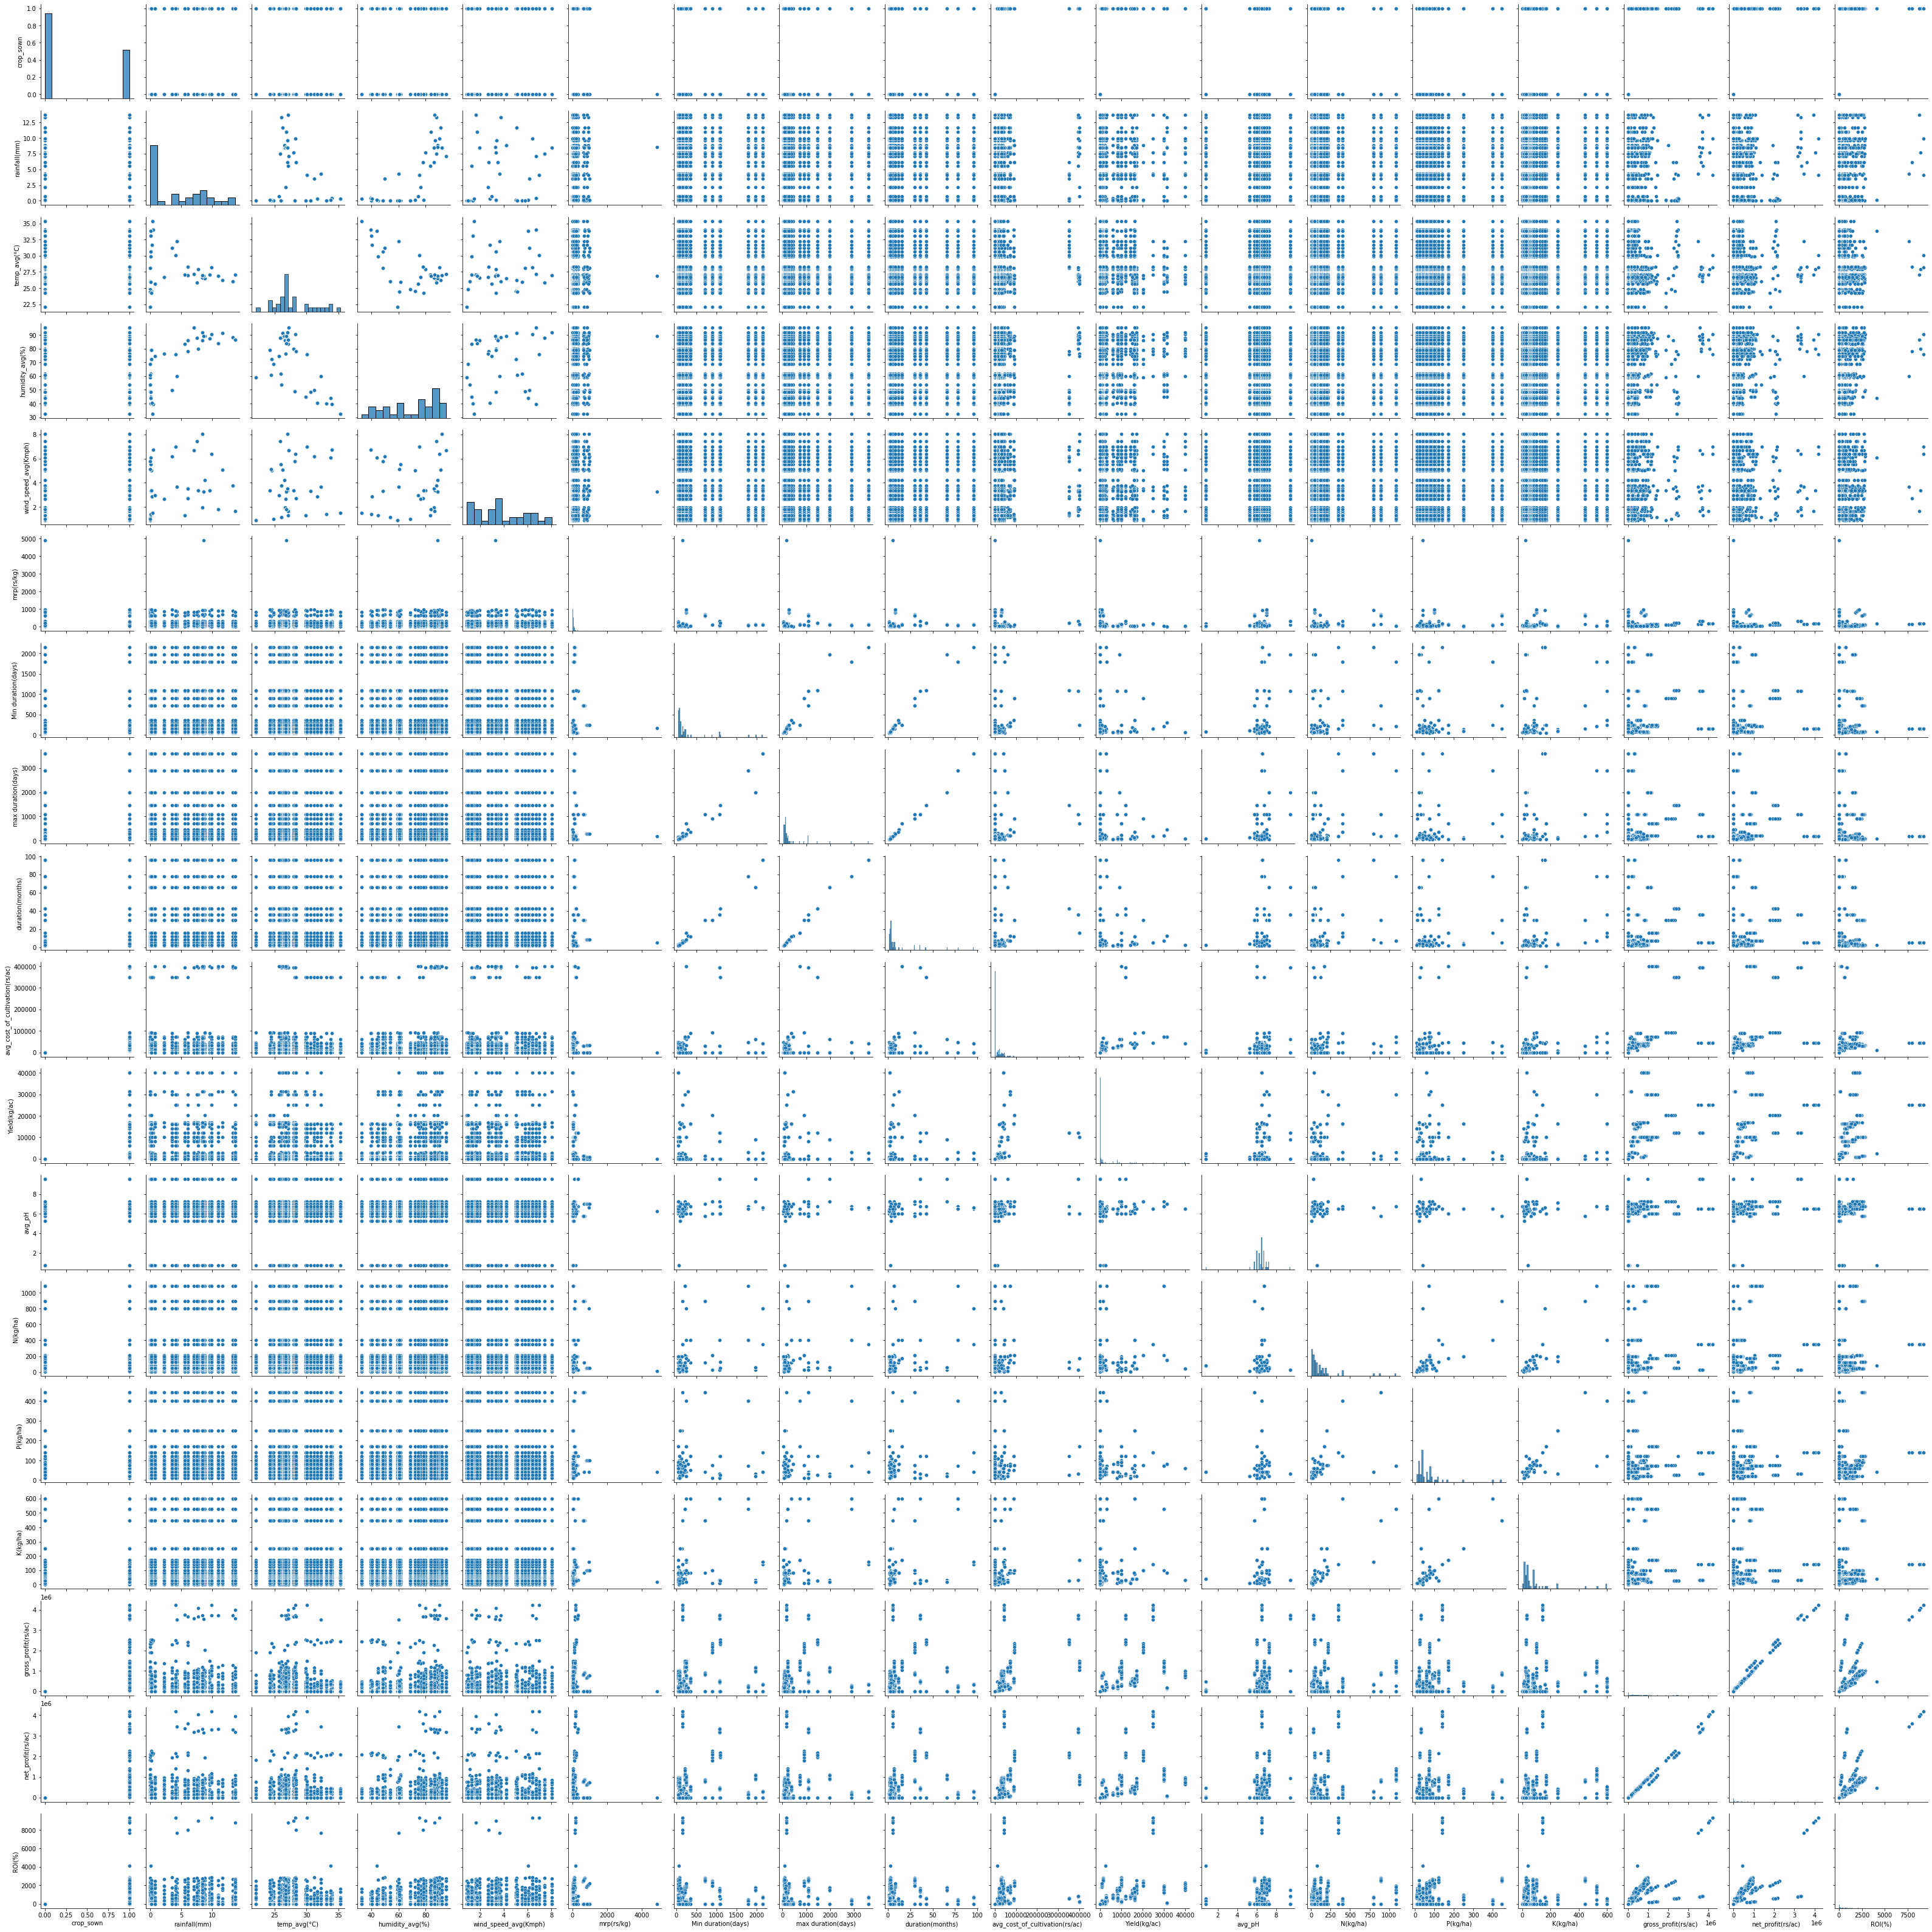

In [17]:
#Pair plot is used to understand the best set of features to explain a relationship between two variables

sns.pairplot(best_crop)

<AxesSubplot:xlabel='crop_type', ylabel='count'>

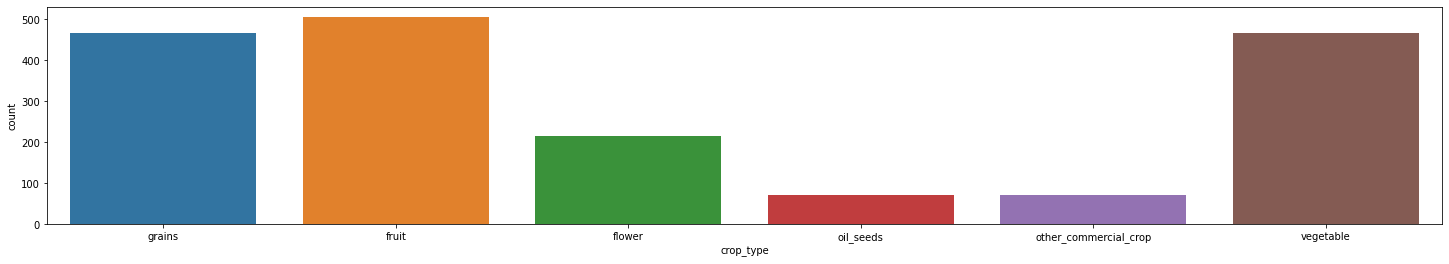

In [18]:
# count plot of each crop type
plt.figure(figsize=(25,4))
sns.countplot(best_crop['crop_type'])

In [19]:
# scatter plot

crop_scatter = best_crop[(best_crop['Crop']=='PADDY') | 
                    (best_crop['Crop']=='Wheat') | 
                    (best_crop['Crop']=='JOWAR') |
                    (best_crop['Crop']=='BAJRA') |
                    (best_crop['Crop']=='MAIZE') |
                    (best_crop['Crop']=='RAGI') |
                    (best_crop['Crop']=='REDGRAM') |
                    (best_crop['Crop']=='GREENGRAM') |
                    (best_crop['Crop']=='BLACKGRAM') |
                    (best_crop['Crop']=='HORSEGRAM') |
                    (best_crop['Crop']=='BengalGram') |
                    (best_crop['Crop']=='Cowpea') |
                    (best_crop['Crop']=='GROUNDNUT') |
                    (best_crop['Crop']=='SESAMUM (Gingelly)') |
                    (best_crop['Crop']=='SUNFLOWER') |
                    (best_crop['Crop']=='Safflower') |
                    (best_crop['Crop']=='CASTOR') |
                    (best_crop['Crop']=='SOYABEAN') |
                    (best_crop['Crop']=='COTTON') |
                    (best_crop['Crop']=='Chillies') |
                    (best_crop['Crop']=='SUGARCANE') |
                    (best_crop['Crop']=='ONION') |
                    (best_crop['Crop']=='Tomato') |
                    (best_crop['Crop']=='Brinjal') |
                    (best_crop['Crop']=='Ginger') |
                    (best_crop['Crop']=='Potato') |
                    (best_crop['Crop']=='Bhendi') |
                    (best_crop['Crop']=='Cabbage') |
                    (best_crop['Crop']=='Coccinea') |
                    (best_crop['Crop']=='Turmeric') |
                    (best_crop['Crop']=='Banana') |
                    (best_crop['Crop']=='Pomegrante') |
                    (best_crop['Crop']=='Custard apple') |
                    (best_crop['Crop']=='Grapes') |
                    (best_crop['Crop']=='Papaya') |
                    (best_crop['Crop']=='Mango') |
                    (best_crop['Crop']=='Dragon Fruit') |
                    (best_crop['Crop']=='Rose') |
                    (best_crop['Crop']=='Marigold') |
                    (best_crop['Crop']=='Capsicum') |
                    (best_crop['Crop']=='Cauliflower') |
                    (best_crop['Crop']=='Bitter Gourd') |
                    (best_crop['Crop']=='Bottle Gourd') |
                    (best_crop['Crop']=='Cashew') |
                    (best_crop['Crop']=='Mulberry') |
                    (best_crop['Crop']=='Coconut') |
                    (best_crop['Crop']=='Jasmine') |
                    (best_crop['Crop']=='Chrysanthemum') |
                    (best_crop['Crop']=='Avacado') |
                    (best_crop['Crop']=='Dates')]

fig = px.scatter(crop_scatter, x="avg_cost_of_cultivation(rs/ac)", y="net_profit(rs/ac)", color="Crop", symbol="Crop")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Text(0.5, 0, 'Crop')

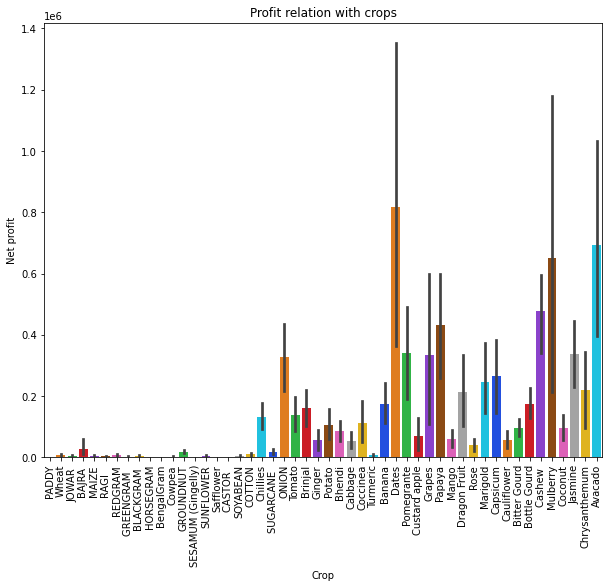

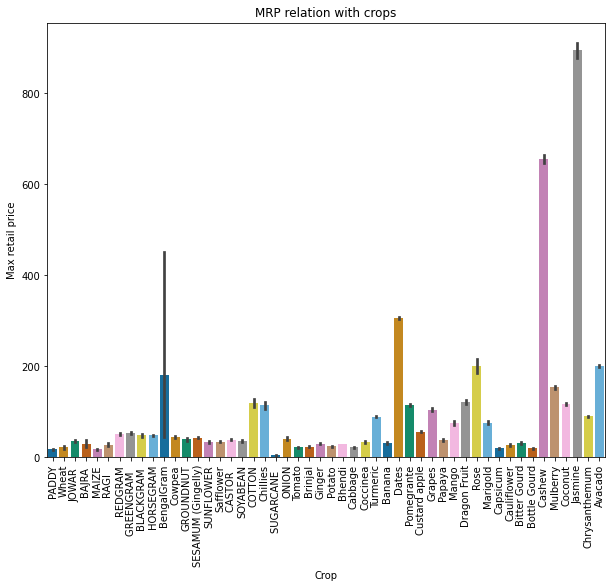

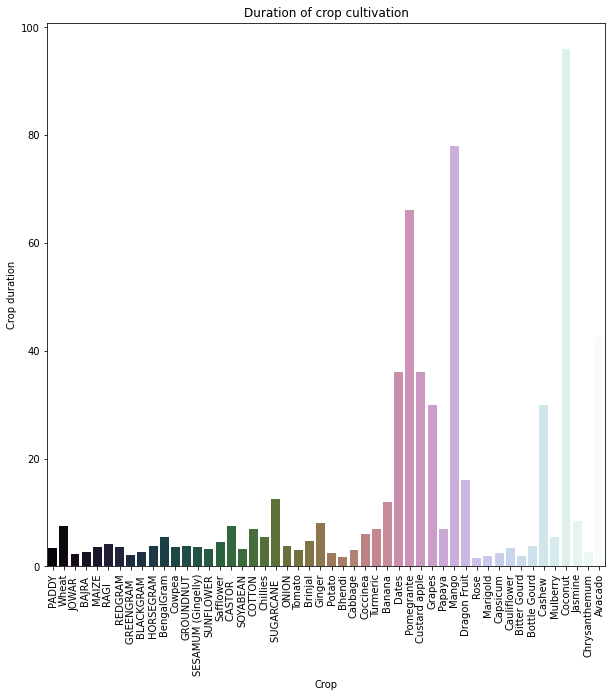

In [20]:
# Profit relation with crops

plt.figure(figsize=(10,8))
plt.title("Profit relation with crops")
sns.barplot(y="net_profit(rs/ac)",x="Crop", data=best_crop,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("Net profit")
plt.xlabel("Crop")
plt.figure(figsize=(10,8))

# MRP relation with crops

plt.title("MRP relation with crops")
sns.barplot(y="mrp(rs/kg)",x="Crop", data=best_crop,palette="colorblind")
plt.xticks(rotation='vertical')
plt.ylabel("Max retail price")
plt.xlabel("Crop")
plt.figure(figsize=(10,10))

# Duration of crop cultivation
plt.title("Duration of crop cultivation")
sns.barplot(y="duration(months)",x="Crop", data=best_crop,palette="cubehelix")
plt.xticks(rotation='vertical')
plt.ylabel("Crop duration")
plt.xlabel("Crop")

Text(0.5, 0, 'Crop')

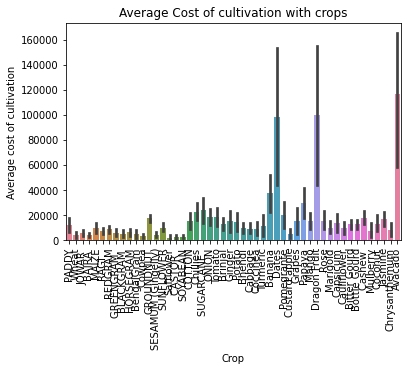

In [21]:
# Plot showing average Cost of cultivation with crops

plt.title("Average Cost of cultivation with crops")
sns.barplot(y="avg_cost_of_cultivation(rs/ac)",x="Crop", data=best_crop,palette="husl")
plt.xticks(rotation='vertical')
plt.ylabel("Average cost of cultivation")
plt.xlabel("Crop")

In [22]:
# changing column names for deployment purpose
best_crop.rename(columns = {"rainfall(mm)": "rainfall", "temp_avg(°C)": "temp_avg", "humidity_avg(%)": "humidity_avg", "wind_speed_avg(Kmph)": "wind_speed_avg", "mrp(rs/kg)": "mrp", "Min duration(days)": "Min_duration", "max duration(days)": "max_duration", "duration(months)": "duration", "avg_cost_of_cultivation(rs/ac)": "avg_cost_of_cultivation", "Yield(kg/ac)": "Yield", "N(kg/ha)": "N", "P(kg/ha)": "P", "K(kg/ha)": "K", "gross_profit(rs/ac)": "gross_profit", "net_profit(rs/ac)": "net_profit", "ROI(%)": "ROI"}, inplace = True)



In [23]:
# Data set with new column names
best_crop

date           Crop crop_type  crop_sown  rainfall  temp_avg  \
0     2019-Jan          PADDY    grains          0      0.00  22.04495   
1     2019-Jan          Wheat    grains          0      0.00  22.04495   
2     2019-Jan         JOWAR     grains          0      0.00  22.04495   
3     2019-Jan         BAJRA     grains          0      0.00  22.04495   
4     2019-Jan          MAIZE    grains          0      0.00  22.04495   
...        ...            ...       ...        ...       ...       ...   
1795  2021-Dec       Mulberry     fruit          0      0.12  24.25600   
1796  2021-Dec        Coconut     fruit          0      0.12  24.25600   
1797  2021-Dec        Jasmine    flower          1      0.12  24.25600   
1798  2021-Dec  Chrysanthemum    flower          0      0.12  24.25600   
1799  2021-Dec        Avacado     fruit          0      0.12  24.25600   

      humidity_avg  wind_speed_avg      mrp  Min_duration  ...  avg_pH      N  \
0        59.179032        0.919355   17.294            90  ...    5.75  150.0   
1        59.179032        0.919355   18.400           210  ...    6.50   80.0   
2        59.179032        0.919355   24.500            65  ...    6.75   80.0   
3        59.179032        0.919355   19.500            70  ...    0.75   80.0   
4        59.179032        0.919355   17.000           105  ...    6.50   60.0   
...            ...             ...      ...           ...  ...     ...    ...   
1795     78.780000        3.345000  169.000           150  ...    6.50  350.0   
1796     78.780000        3.345000  111.000          2160  ...    6.60  800.0   
1797     78.780000        3.345000  966.000           240  ...    7.00   50.0   
1798     78.780000        3.345000   80.000            75  ...    6.75  125.0   
1799     78.780000        3.345000  195.000          1095  ...    6.00   50.0   

        P      K irrigation  gross_profit  net_profit          ROI  \
0      60   60.0        yes           0.0         0.0     0.000000   
1      40   40.0        yes           0.0         0.0     0.000000   
2      40   40.0        yes           0.0         0.0     0.000000   
3      40   40.0         no           0.0         0.0     0.000000   
4      30   30.0        yes           0.0         0.0     0.000000   
...   ...    ...        ...           ...         ...          ...   
1795  140  140.0        yes           0.0         0.0     0.000000   
1796   40  160.0         no           0.0         0.0     0.000000   
1797  100  100.0         no      772800.0    739300.0  2206.865672   
1798  120   25.0        yes           0.0         0.0     0.000000   
1799   25   25.0        yes           0.0         0.0     0.000000   

            sow_and_harvest          crop_term  
0       one_sow_one_harvest         short_term  
1       one_sow_one_harvest  intermediate_term  
2       one_sow_one_harvest         short_term  
3       one_sow_one_harvest         short_term  
4       one_sow_one_harvest         short_term  
...                     ...                ...  
1795  one_sow_many_harvests  intermediate_term  
1796  one_sow_many_harvests          long_term  
1797   one_sow_few_harvests  intermediate_term  
1798   one_sow_few_harvests         short_term  
1799  one_sow_many_harvests          long_term  

[1800 rows x 25 columns]

In [24]:
# names of new columns
best_crop.columns

Index(['date', 'Crop', 'crop_type', 'crop_sown', 'rainfall', 'temp_avg',
       'humidity_avg', 'wind_speed_avg', 'mrp', 'Min_duration', 'max_duration',
       'duration', 'avg_cost_of_cultivation', 'Yield', 'Soil_type', 'avg_pH',
       'N', 'P', 'K', 'irrigation', 'gross_profit', 'net_profit', 'ROI',
       'sow_and_harvest', 'crop_term'],
      dtype='object')

In [25]:
# Label encoding for categorical column
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [26]:
best_crop['irrigation']= label_encoder.fit_transform(best_crop['irrigation'])
best_crop['date']= label_encoder.fit_transform(best_crop['date'])
best_crop['crop_type']= label_encoder.fit_transform(best_crop['crop_type'])
best_crop['Soil_type']= label_encoder.fit_transform(best_crop['Soil_type'])
best_crop['sow_and_harvest']= label_encoder.fit_transform(best_crop['sow_and_harvest'])
best_crop['crop_term']= label_encoder.fit_transform(best_crop['crop_term'])




In [27]:
# label encoded data set

best_crop

date           Crop  crop_type  crop_sown  rainfall  temp_avg  \
0        4          PADDY          2          0      0.00  22.04495   
1        4          Wheat          2          0      0.00  22.04495   
2        4         JOWAR           2          0      0.00  22.04495   
3        4         BAJRA           2          0      0.00  22.04495   
4        4          MAIZE          2          0      0.00  22.04495   
...    ...            ...        ...        ...       ...       ...   
1795    26       Mulberry          1          0      0.12  24.25600   
1796    26        Coconut          1          0      0.12  24.25600   
1797    26        Jasmine          0          1      0.12  24.25600   
1798    26  Chrysanthemum          0          0      0.12  24.25600   
1799    26        Avacado          1          0      0.12  24.25600   

      humidity_avg  wind_speed_avg      mrp  Min_duration  ...  avg_pH      N  \
0        59.179032        0.919355   17.294            90  ...    5.75  150.0   
1        59.179032        0.919355   18.400           210  ...    6.50   80.0   
2        59.179032        0.919355   24.500            65  ...    6.75   80.0   
3        59.179032        0.919355   19.500            70  ...    0.75   80.0   
4        59.179032        0.919355   17.000           105  ...    6.50   60.0   
...            ...             ...      ...           ...  ...     ...    ...   
1795     78.780000        3.345000  169.000           150  ...    6.50  350.0   
1796     78.780000        3.345000  111.000          2160  ...    6.60  800.0   
1797     78.780000        3.345000  966.000           240  ...    7.00   50.0   
1798     78.780000        3.345000   80.000            75  ...    6.75  125.0   
1799     78.780000        3.345000  195.000          1095  ...    6.00   50.0   

        P      K  irrigation  gross_profit  net_profit          ROI  \
0      60   60.0           1           0.0         0.0     0.000000   
1      40   40.0           1           0.0         0.0     0.000000   
2      40   40.0           1           0.0         0.0     0.000000   
3      40   40.0           0           0.0         0.0     0.000000   
4      30   30.0           1           0.0         0.0     0.000000   
...   ...    ...         ...           ...         ...          ...   
1795  140  140.0           1           0.0         0.0     0.000000   
1796   40  160.0           0           0.0         0.0     0.000000   
1797  100  100.0           0      772800.0    739300.0  2206.865672   
1798  120   25.0           1           0.0         0.0     0.000000   
1799   25   25.0           1           0.0         0.0     0.000000   

      sow_and_harvest  crop_term  
0                   2          2  
1                   2          0  
2                   2          2  
3                   2          2  
4                   2          2  
...               ...        ...  
1795                1          0  
1796                1          1  
1797                0          0  
1798                0          2  
1799                1          1  

[1800 rows x 25 columns]

In [28]:
# Changing order of columns for scaling purpose
best_crop[['Crop','date', 'crop_type', 'crop_sown', 'rainfall', 'temp_avg',
       'humidity_avg', 'wind_speed_avg', 'mrp', 'Min_duration', 'max_duration',
       'duration', 'avg_cost_of_cultivation', 'Yield', 'Soil_type', 'avg_pH',
       'N', 'P', 'K', 'irrigation', 'gross_profit', 'net_profit', 'ROI',
       'sow_and_harvest', 'crop_term']]


Crop  date  crop_type  crop_sown  rainfall  temp_avg  \
0             PADDY     4          2          0      0.00  22.04495   
1             Wheat     4          2          0      0.00  22.04495   
2            JOWAR      4          2          0      0.00  22.04495   
3            BAJRA      4          2          0      0.00  22.04495   
4             MAIZE     4          2          0      0.00  22.04495   
...             ...   ...        ...        ...       ...       ...   
1795       Mulberry    26          1          0      0.12  24.25600   
1796        Coconut    26          1          0      0.12  24.25600   
1797        Jasmine    26          0          1      0.12  24.25600   
1798  Chrysanthemum    26          0          0      0.12  24.25600   
1799        Avacado    26          1          0      0.12  24.25600   

      humidity_avg  wind_speed_avg      mrp  Min_duration  ...  avg_pH      N  \
0        59.179032        0.919355   17.294            90  ...    5.75  150.0   
1        59.179032        0.919355   18.400           210  ...    6.50   80.0   
2        59.179032        0.919355   24.500            65  ...    6.75   80.0   
3        59.179032        0.919355   19.500            70  ...    0.75   80.0   
4        59.179032        0.919355   17.000           105  ...    6.50   60.0   
...            ...             ...      ...           ...  ...     ...    ...   
1795     78.780000        3.345000  169.000           150  ...    6.50  350.0   
1796     78.780000        3.345000  111.000          2160  ...    6.60  800.0   
1797     78.780000        3.345000  966.000           240  ...    7.00   50.0   
1798     78.780000        3.345000   80.000            75  ...    6.75  125.0   
1799     78.780000        3.345000  195.000          1095  ...    6.00   50.0   

        P      K  irrigation  gross_profit  net_profit          ROI  \
0      60   60.0           1           0.0         0.0     0.000000   
1      40   40.0           1           0.0         0.0     0.000000   
2      40   40.0           1           0.0         0.0     0.000000   
3      40   40.0           0           0.0         0.0     0.000000   
4      30   30.0           1           0.0         0.0     0.000000   
...   ...    ...         ...           ...         ...          ...   
1795  140  140.0           1           0.0         0.0     0.000000   
1796   40  160.0           0           0.0         0.0     0.000000   
1797  100  100.0           0      772800.0    739300.0  2206.865672   
1798  120   25.0           1           0.0         0.0     0.000000   
1799   25   25.0           1           0.0         0.0     0.000000   

      sow_and_harvest  crop_term  
0                   2          2  
1                   2          0  
2                   2          2  
3                   2          2  
4                   2          2  
...               ...        ...  
1795                1          0  
1796                1          1  
1797                0          0  
1798                0          2  
1799                1          1  

[1800 rows x 25 columns]

In [29]:
best_crop

date           Crop  crop_type  crop_sown  rainfall  temp_avg  \
0        4          PADDY          2          0      0.00  22.04495   
1        4          Wheat          2          0      0.00  22.04495   
2        4         JOWAR           2          0      0.00  22.04495   
3        4         BAJRA           2          0      0.00  22.04495   
4        4          MAIZE          2          0      0.00  22.04495   
...    ...            ...        ...        ...       ...       ...   
1795    26       Mulberry          1          0      0.12  24.25600   
1796    26        Coconut          1          0      0.12  24.25600   
1797    26        Jasmine          0          1      0.12  24.25600   
1798    26  Chrysanthemum          0          0      0.12  24.25600   
1799    26        Avacado          1          0      0.12  24.25600   

      humidity_avg  wind_speed_avg      mrp  Min_duration  ...  avg_pH      N  \
0        59.179032        0.919355   17.294            90  ...    5.75  150.0   
1        59.179032        0.919355   18.400           210  ...    6.50   80.0   
2        59.179032        0.919355   24.500            65  ...    6.75   80.0   
3        59.179032        0.919355   19.500            70  ...    0.75   80.0   
4        59.179032        0.919355   17.000           105  ...    6.50   60.0   
...            ...             ...      ...           ...  ...     ...    ...   
1795     78.780000        3.345000  169.000           150  ...    6.50  350.0   
1796     78.780000        3.345000  111.000          2160  ...    6.60  800.0   
1797     78.780000        3.345000  966.000           240  ...    7.00   50.0   
1798     78.780000        3.345000   80.000            75  ...    6.75  125.0   
1799     78.780000        3.345000  195.000          1095  ...    6.00   50.0   

        P      K  irrigation  gross_profit  net_profit          ROI  \
0      60   60.0           1           0.0         0.0     0.000000   
1      40   40.0           1           0.0         0.0     0.000000   
2      40   40.0           1           0.0         0.0     0.000000   
3      40   40.0           0           0.0         0.0     0.000000   
4      30   30.0           1           0.0         0.0     0.000000   
...   ...    ...         ...           ...         ...          ...   
1795  140  140.0           1           0.0         0.0     0.000000   
1796   40  160.0           0           0.0         0.0     0.000000   
1797  100  100.0           0      772800.0    739300.0  2206.865672   
1798  120   25.0           1           0.0         0.0     0.000000   
1799   25   25.0           1           0.0         0.0     0.000000   

      sow_and_harvest  crop_term  
0                   2          2  
1                   2          0  
2                   2          2  
3                   2          2  
4                   2          2  
...               ...        ...  
1795                1          0  
1796                1          1  
1797                0          0  
1798                0          2  
1799                1          1  

[1800 rows x 25 columns]

In [30]:
# Normalization of data set

cols_to_norm = ['date', 'crop_type', 'crop_sown', 'rainfall',
       'temp_avg', 'humidity_avg', 'wind_speed_avg', 'mrp',
       'Min_duration', 'max_duration', 'duration',
       'avg_cost_of_cultivation', 'Yield', 'Soil_type', 'avg_pH',
       'N', 'P', 'K', 'irrigation', 'gross_profit',
       'net_profit', 'ROI', 'sow_and_harvest', 'crop_term']
best_crop[cols_to_norm] = best_crop[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [31]:
best_crop

date           Crop  crop_type  crop_sown  rainfall  temp_avg  \
0     0.114286          PADDY        0.4        0.0  0.000000  0.000000   
1     0.114286          Wheat        0.4        0.0  0.000000  0.000000   
2     0.114286         JOWAR         0.4        0.0  0.000000  0.000000   
3     0.114286         BAJRA         0.4        0.0  0.000000  0.000000   
4     0.114286          MAIZE        0.4        0.0  0.000000  0.000000   
...        ...            ...        ...        ...       ...       ...   
1795  0.742857       Mulberry        0.2        0.0  0.008759  0.166222   
1796  0.742857        Coconut        0.2        0.0  0.008759  0.166222   
1797  0.742857        Jasmine        0.0        1.0  0.008759  0.166222   
1798  0.742857  Chrysanthemum        0.0        0.0  0.008759  0.166222   
1799  0.742857        Avacado        0.2        0.0  0.008759  0.166222   

      humidity_avg  wind_speed_avg       mrp  Min_duration  ...    avg_pH  \
0         0.423816        0.000000  0.002983      0.021277  ...  0.571429   
1         0.423816        0.000000  0.003210      0.078014  ...  0.657143   
2         0.423816        0.000000  0.004461      0.009456  ...  0.685714   
3         0.423816        0.000000  0.003436      0.011820  ...  0.000000   
4         0.423816        0.000000  0.002923      0.028369  ...  0.657143   
...            ...             ...       ...           ...  ...       ...   
1795      0.737181        0.341485  0.034101      0.049645  ...  0.657143   
1796      0.737181        0.341485  0.022204      1.000000  ...  0.668571   
1797      0.737181        0.341485  0.197580      0.092199  ...  0.714286   
1798      0.737181        0.341485  0.015845      0.014184  ...  0.685714   
1799      0.737181        0.341485  0.039434      0.496454  ...  0.600000   

             N         P         K  irrigation  gross_profit  net_profit  \
0     0.133887  0.114943  0.100000         1.0      0.000000    0.000000   
1     0.069252  0.068966  0.066667         1.0      0.000000    0.000000   
2     0.069252  0.068966  0.066667         1.0      0.000000    0.000000   
3     0.069252  0.068966  0.066667         0.0      0.000000    0.000000   
4     0.050785  0.045977  0.050000         1.0      0.000000    0.000000   
...        ...       ...       ...         ...           ...         ...   
1795  0.318560  0.298851  0.233333         1.0      0.000000    0.000000   
1796  0.734072  0.068966  0.266667         0.0      0.000000    0.000000   
1797  0.041551  0.206897  0.166667         0.0      0.182911    0.176866   
1798  0.110803  0.252874  0.041667         1.0      0.000000    0.000000   
1799  0.041551  0.034483  0.041667         1.0      0.000000    0.000000   

           ROI  sow_and_harvest  crop_term  
0     0.000000              1.0        1.0  
1     0.000000              1.0        0.0  
2     0.000000              1.0        1.0  
3     0.000000              1.0        1.0  
4     0.000000              1.0        1.0  
...        ...              ...        ...  
1795  0.000000              0.5        0.0  
1796  0.000000              0.5        0.5  
1797  0.237581              0.0        0.0  
1798  0.000000              0.0        1.0  
1799  0.000000              0.5        0.5  

[1800 rows x 25 columns]

In [32]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
train, test = train_test_split(best_crop, test_size = 0.3)

In [33]:
features = best_crop[['date', 'crop_type', 'crop_sown', 'rainfall',
       'temp_avg', 'humidity_avg', 'wind_speed_avg', 'mrp',
       'Min_duration', 'max_duration', 'duration',
       'avg_cost_of_cultivation', 'Yield', 'Soil_type', 'avg_pH',
       'N', 'P', 'K', 'irrigation', 'gross_profit',
       'net_profit', 'ROI', 'sow_and_harvest', 'crop_term']]
    
target = best_crop['Crop']
labels = best_crop['Crop']

In [34]:
best_crop.columns

Index(['date', 'Crop', 'crop_type', 'crop_sown', 'rainfall', 'temp_avg',
       'humidity_avg', 'wind_speed_avg', 'mrp', 'Min_duration', 'max_duration',
       'duration', 'avg_cost_of_cultivation', 'Yield', 'Soil_type', 'avg_pH',
       'N', 'P', 'K', 'irrigation', 'gross_profit', 'net_profit', 'ROI',
       'sow_and_harvest', 'crop_term'],
      dtype='object')

In [35]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [36]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [37]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  53.05555555555556
                    precision    recall  f1-score   support

           Avacado       0.45      1.00      0.62         5
            BAJRA        0.00      0.00      0.00         9
        BLACKGRAM        0.36      1.00      0.53         5
            Banana       1.00      1.00      1.00         4
        BengalGram       0.46      1.00      0.63         6
            Bhendi       0.00      0.00      0.00        12
      Bitter Gourd       0.50      1.00      0.67         9
      Bottle Gourd       1.00      0.86      0.92         7
           Brinjal       1.00      1.00      1.00         6
          CASTOR         1.00      1.00      1.00         5
            COTTON       0.47      1.00      0.64         9
           Cabbage       0.00      0.00      0.00         6
          Capsicum       0.00      0.00      0.00         9
           Cashew        0.43      1.00      0.60         9
       Cauliflower       0.00      0.00      0.00  

In [38]:
# Evaluation on Train data
accuracy_score(Ytrain, DecisionTree.predict(Xtrain)) 

0.6666666666666666

In [39]:
from sklearn.model_selection import cross_val_score


In [40]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [41]:
score

array([0.59444444, 0.62222222, 0.625     , 0.62777778, 0.61944444])

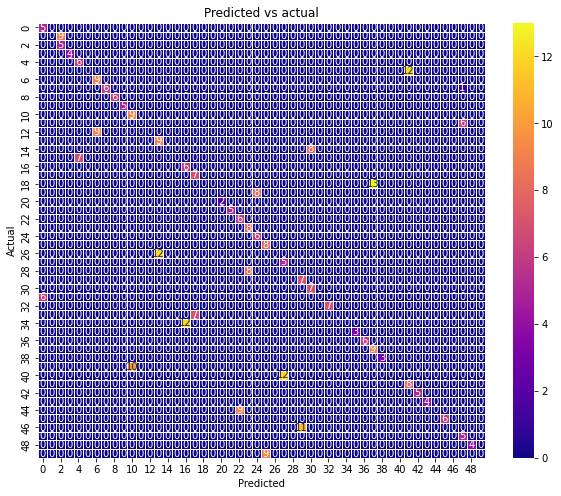

In [42]:
#creating a confusion matrix for predicted and actual values
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='plasma', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [43]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [44]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9805555555555555
                    precision    recall  f1-score   support

           Avacado       1.00      1.00      1.00         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        1.00      1.00      1.00         5
            Banana       1.00      1.00      1.00         4
        BengalGram       1.00      1.00      1.00         6
            Bhendi       0.92      1.00      0.96        12
      Bitter Gourd       1.00      0.89      0.94         9
      Bottle Gourd       1.00      0.86      0.92         7
           Brinjal       1.00      1.00      1.00         6
          CASTOR         1.00      1.00      1.00         5
            COTTON       1.00      1.00      1.00         9
           Cabbage       1.00      1.00      1.00         6
          Capsicum       1.00      1.00      1.00         9
           Cashew        1.00      0.89      0.94         9
       Cauliflower       1.00      1.00      1.00   

In [45]:
# Evaluation on Testing Data
accuracy_score(Ytrain, NaiveBayes.predict(Xtrain))

1.0

In [46]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.92777778, 1.        , 1.        , 1.        , 1.        ])

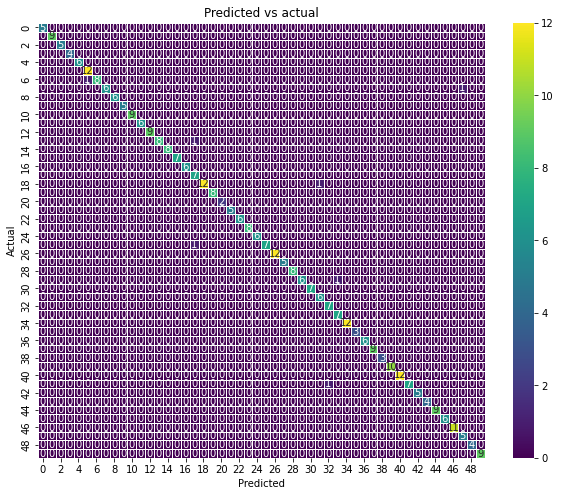

In [47]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [48]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [49]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.4888888888888889
                    precision    recall  f1-score   support

           Avacado       0.83      1.00      0.91         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        0.38      1.00      0.56         5
            Banana       1.00      1.00      1.00         4
        BengalGram       0.30      1.00      0.46         6
            Bhendi       0.00      0.00      0.00        12
      Bitter Gourd       0.00      0.00      0.00         9
      Bottle Gourd       0.57      0.57      0.57         7
           Brinjal       0.33      0.50      0.40         6
          CASTOR         0.19      1.00      0.32         5
            COTTON       0.00      0.00      0.00         9
           Cabbage       0.32      1.00      0.48         6
          Capsicum       1.00      0.22      0.36         9
           Cashew        1.00      0.89      0.94         9
       Cauliflower       0.00      0.00      0.00         8


In [50]:
# Evaluation on Train data
accuracy_score(Ytrain, SVM.predict(Xtrain)) 

0.5979166666666667

In [51]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.63888889, 0.63888889, 0.76388889, 0.68611111, 0.675     ])

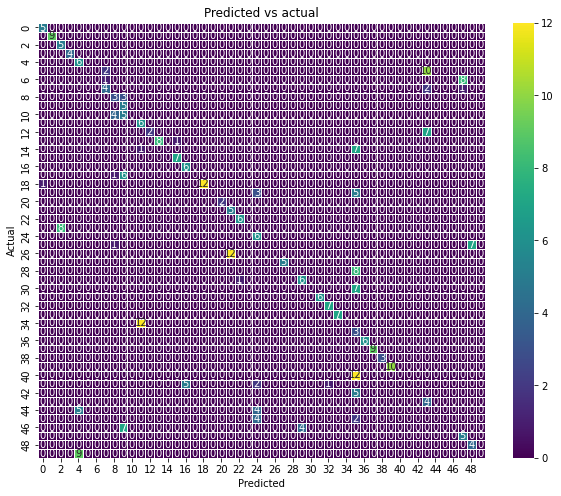

In [52]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [53]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8361111111111111
                    precision    recall  f1-score   support

           Avacado       0.83      1.00      0.91         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        0.42      1.00      0.59         5
            Banana       1.00      1.00      1.00         4
        BengalGram       1.00      1.00      1.00         6
            Bhendi       1.00      0.50      0.67        12
      Bitter Gourd       0.89      0.89      0.89         9
      Bottle Gourd       0.46      0.86      0.60         7
           Brinjal       0.71      0.83      0.77         6
          CASTOR         0.33      0.40      0.36         5
            COTTON       0.57      0.44      0.50         9
           Cabbage       0.60      1.00      0.75         6
          Capsicum       1.00      1.00      1.00         9
           Cashew        1.00      0.89      0.94         9
       Cauliflower       1.00      1.00     

In [54]:
# Evaluation on Train data
accuracy_score(Ytrain, LogReg.predict(Xtrain))  

0.9111111111111111

In [55]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.83333333, 0.88333333, 0.91388889, 0.91111111, 0.89444444])

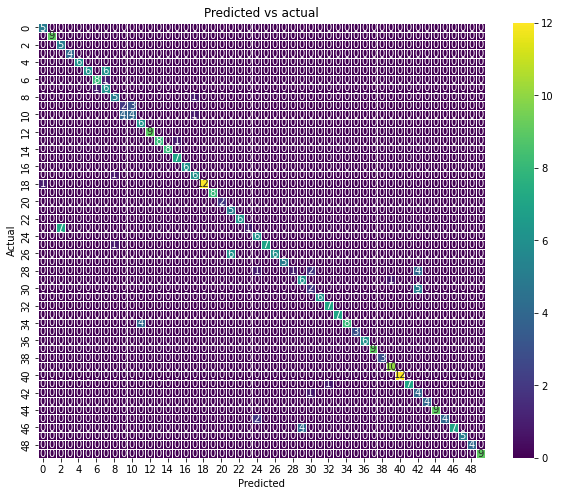

In [56]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [57]:
import pickle
# Dump the trained LogisticRegression classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [58]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9944444444444445
                    precision    recall  f1-score   support

           Avacado       1.00      1.00      1.00         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        1.00      1.00      1.00         5
            Banana       1.00      1.00      1.00         4
        BengalGram       1.00      1.00      1.00         6
            Bhendi       1.00      1.00      1.00        12
      Bitter Gourd       1.00      1.00      1.00         9
      Bottle Gourd       1.00      1.00      1.00         7
           Brinjal       0.86      1.00      0.92         6
          CASTOR         1.00      1.00      1.00         5
            COTTON       1.00      1.00      1.00         9
           Cabbage       1.00      1.00      1.00         6
          Capsicum       1.00      1.00      1.00         9
           Cashew        1.00      0.89      0.94         9
       Cauliflower       1.00      1.00      1.00         8
 

In [59]:
# Evaluation on Train data
accuracy_score(Ytrain, RF.predict(Xtrain))  

1.0

In [60]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.95277778, 1.        , 1.        , 1.        , 1.        ])

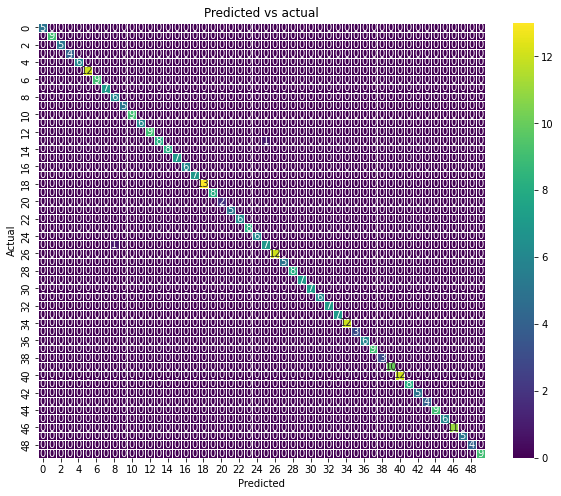

In [61]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [62]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [63]:
# xgboost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[10:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9916666666666667
                    precision    recall  f1-score   support

           Avacado       1.00      1.00      1.00         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        1.00      1.00      1.00         5
            Banana       1.00      1.00      1.00         4
        BengalGram       1.00      1.00      1.00         6
            Bhendi       1.00      1.00      1.00        12
      Bitter Gourd       1.00      1.00      1.00         9
      Bottle Gourd       0.86      0.86      0.86         7
           Brinjal       0.86      1.00      0.92         6
          CASTOR         1.00      1.00      

In [64]:
# Evaluation on Train data
accuracy_score(Ytrain, XB.predict(Xtrain))  

1.0

In [65]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[10:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.94444444, 1.        , 0.99722222, 0.99722222, 0.99444444])

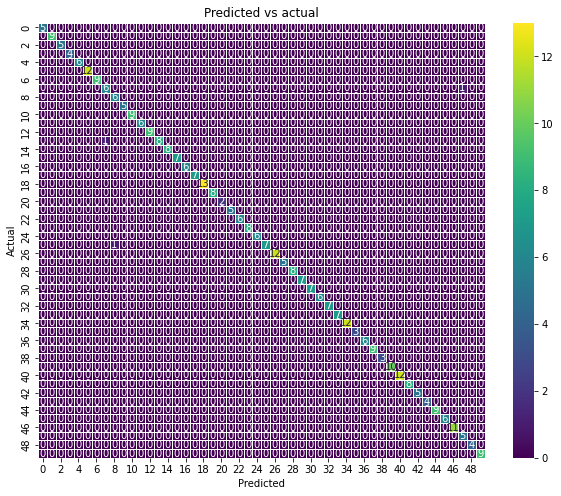

In [66]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [67]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [68]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(Xtrain,Ytrain)

predicted_values = knn.predict(Xtest)

acc_knn = metrics.accuracy_score(Ytest,predicted_values)
acc.append(acc_knn)
model.append('K Nearest Neighbours')
print("Accuracy of KNN is :  ", acc_knn*100)

print(classification_report(Ytest,predicted_values))

Accuracy of KNN is :   68.05555555555556
                    precision    recall  f1-score   support

           Avacado       0.38      1.00      0.56         5
            BAJRA        1.00      1.00      1.00         9
        BLACKGRAM        0.25      0.40      0.31         5
            Banana       1.00      1.00      1.00         4
        BengalGram       0.40      0.67      0.50         6
            Bhendi       0.70      0.58      0.64        12
      Bitter Gourd       0.86      0.67      0.75         9
      Bottle Gourd       0.55      0.86      0.67         7
           Brinjal       0.40      0.67      0.50         6
          CASTOR         0.67      0.40      0.50         5
            COTTON       0.36      0.44      0.40         9
           Cabbage       0.21      0.50      0.30         6
          Capsicum       1.00      0.78      0.88         9
           Cashew        1.00      0.89      0.94         9
       Cauliflower       0.50      0.50      0.50         

In [69]:
# Evaluation on Train data
accuracy_score(Ytrain, knn.predict(Xtrain)) 

0.8458333333333333

In [70]:
import pickle
# Dump the trained K Nearest Neighbours model with Pickle
knn_pkl_filename = 'knn.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
knn_Model_pkl.close()

In [71]:
# Cross validation score (XGBoost)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.81666667, 0.83611111, 0.83611111, 0.83888889, 0.79444444])

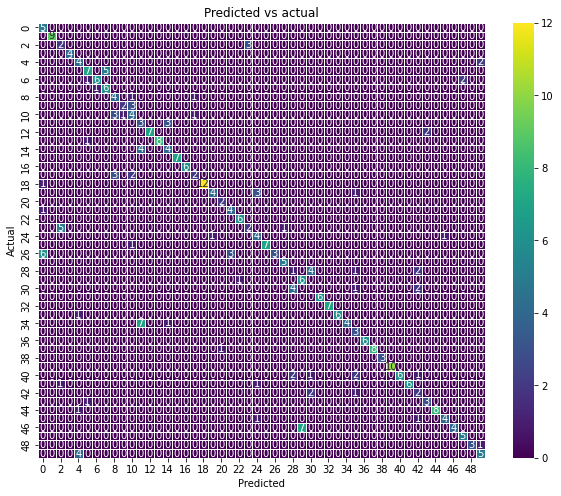

In [72]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

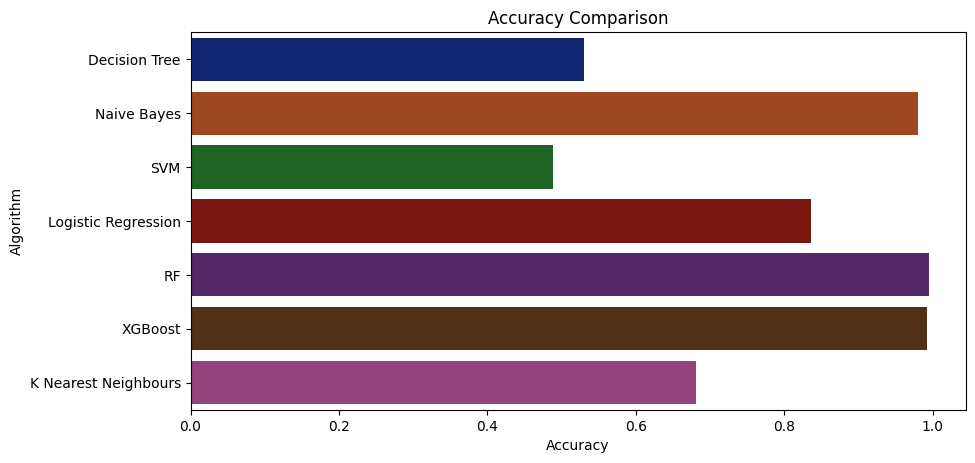

In [73]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [74]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.5305555555555556
Naive Bayes --> 0.9805555555555555
SVM --> 0.4888888888888889
Logistic Regression --> 0.8361111111111111
RF --> 0.9944444444444445
XGBoost --> 0.9916666666666667
K Nearest Neighbours --> 0.6805555555555556


In [75]:
# Testing prediction

data = np.array([[2022,1, 0, 22.04495, 59.17903226, 0.919354839, 29, 55,55,1.833333333, 24000, 8099, 6.4, 30, 40, 40, 234871, 210871, 878.6291667, 1.0, 1.0, 1.0, 1.0, 0.5, ]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Mango']
